## Part 2 Question 1

In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [6]:
train_df = pd.read_csv("./models_data/training_dataset.csv")
test_df = pd.read_csv("./models_data/testing_bodytrack.csv")


In [7]:
train_data = train_df.drop('w_big', axis=1)
y_train = pd.DataFrame(train_df['w_big'])
y_train.loc[y_train['w_big'] < 1, 'w_big'] = 0
y_train.loc[y_train['w_big'] > 1, 'w_big'] = 1


In [8]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize temps & freq
train_data['temp4'] = scaler.fit_transform(train_data[['temp4']])
train_data['temp5'] = scaler.fit_transform(train_data[['temp5']])
train_data['temp6'] = scaler.fit_transform(train_data[['temp6']])
train_data['temp7'] = scaler.fit_transform(train_data[['temp7']])
train_data['temp_gpu'] = scaler.fit_transform(train_data[['temp_gpu']])
train_data['freq_big_cluster'] = scaler.fit_transform(
    train_data[['freq_big_cluster']])


In [9]:
# Process data for testing
test_data = test_df.drop('w_big', axis=1)
y_test = pd.DataFrame(test_df['w_big'])
y_test.loc[y_test['w_big'] < 1, 'w_big'] = 0
y_test.loc[y_test['w_big'] > 1, 'w_big'] = 1


In [10]:
# Normalize temps & freq
test_data['temp4'] = scaler.fit_transform(test_data[['temp4']])
test_data['temp5'] = scaler.fit_transform(test_data[['temp5']])
test_data['temp6'] = scaler.fit_transform(test_data[['temp6']])
test_data['temp7'] = scaler.fit_transform(test_data[['temp7']])
test_data['temp_gpu'] = scaler.fit_transform(test_data[['temp_gpu']])
test_data['freq_big_cluster'] = scaler.fit_transform(
    test_data[['freq_big_cluster']])


In [11]:
# Apply SVC model
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_data, y_train['w_big'])
y_pred = svclassifier.predict(test_data)

## Metric evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9986244841815681
Precision: 0.998898678414097
Recall: 0.998898678414097


In [13]:
labels = [0, 1]
cm = metrics.confusion_matrix(y_test, y_pred, labels=labels)


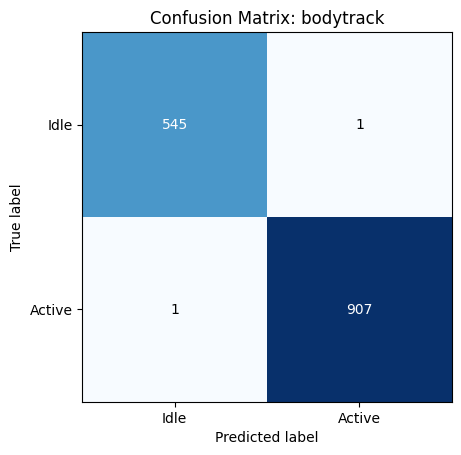

In [14]:

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a heatmap using the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Label the axes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Idle', 'Active'], yticklabels=['Idle', 'Active'],
       xlabel='Predicted label', ylabel='True label')

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Add a title to the plot
# ax.set_title("Confusion Matrix: blackscholes")
ax.set_title("Confusion Matrix: bodytrack")

# Show the plot
plt.show()


#### Question 2

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


In [16]:
# Get Data
train_df = pd.read_csv("./models_data/training_dataset.csv")
test_df = pd.read_csv("./models_data/testing_bodytrack.csv")



In [17]:
# Process data for training
train_data = train_df.drop(
    columns=['total_watts', 'w_big', 'w_little', 'w_gpu', 'w_mem'])
y_train = pd.DataFrame(train_df['w_big'])

# Process data for testing
test_data = test_df.drop(
    columns=['total_watts', 'w_big', 'w_little', 'w_gpu', 'w_mem'])
y_test = pd.DataFrame(test_df['w_big'])


In [18]:
reg = LinearRegression().fit(train_data,y_train['w_big'])
print(reg.score(train_data,y_train['w_big']))
y_pred = reg.predict(test_data)
print(mean_squared_error(y_test['w_big'],y_pred))

0.9869761626648632
0.12156466141600956


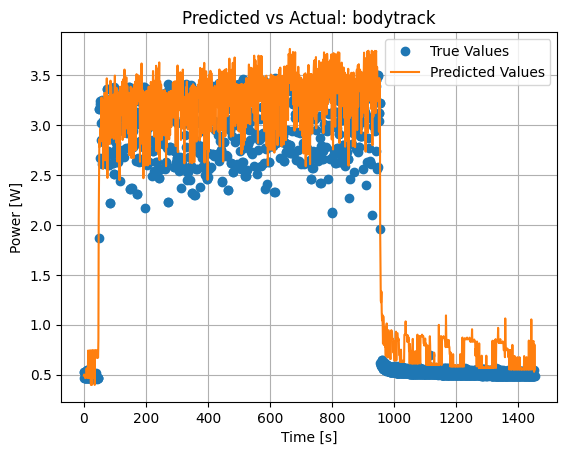

In [19]:
# path for plots
plot_path = "plots/question2"
time = np.arange(0, test_df.shape[0])

plt.figure()
plt.plot(time, test_df['w_big'], 'o', label='True Values')
plt.plot(time, y_pred, label='Predicted Values')
plt.legend()
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
#  plt.title('Predicted vs Actual: blackscholes')
plt.title('Predicted vs Actual: bodytrack')
#  file_name = plot_path + "_hw2_q2_blackscholes.png"
file_name = plot_path + "_hw2_q2_bodytrack.png"
plt.savefig(file_name)
plt.show()


## Question 3

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [21]:
train_df = pd.read_csv("./models_data/training_dataset.csv")
for index, row in train_df.iterrows():
    freq = train_df.loc[index, 'freq_big_cluster']
    if freq == 900000000:
        v_dd = 0.975
    elif freq == 1000000000:
        v_dd = 1
    elif freq == 1500000000:
        v_dd = 1.1375
    elif freq == 2000000000:
        vdd = 1.362

    train_df.at[index, 'dyn_w'] = pow(v_dd, 2) * freq
print(train_df.head())


   total_watts     w_big  w_little     w_gpu     w_mem  usage_c4  usage_c5  \
0        3.065  0.474810  0.033012  0.096321  0.048800       0.0       0.0   
1        2.706  0.235620  0.032095  0.096515  0.032940       0.0       0.0   
2        2.706  0.235620  0.034846  0.096515  0.032940       0.0       0.0   
3        2.637  0.234685  0.034846  0.096321  0.037758       0.0       0.0   
4        2.637  0.233750  0.033929  0.096321  0.032886       0.0       0.0   

   usage_c6  usage_c7  temp4  temp5  temp6  temp7  temp_gpu  freq_big_cluster  \
0       0.0       0.0     49     53     52     48        47        1000000000   
1       0.0       0.0     48     52     52     48        47        1000000000   
2       0.0       0.0     48     52     52     48        47        1000000000   
3       0.0       0.0     48     51     51     48        47        1000000000   
4       0.0       0.0     48     51     51     48        47        1000000000   

          dyn_w  
0  1.000000e+09  
1  1.000

In [22]:
# Process data for training
train_data = train_df.drop(
    columns=['total_watts', 'w_big', 'w_little', 'w_gpu', 'w_mem'])
y_train = pd.DataFrame(train_df['w_big'])

scaler = StandardScaler()
scaler.fit(train_data)

# Transform data with scaler
train_data_scaled = scaler.transform(train_data)


In [23]:
# Apply LRM model
reg = LinearRegression().fit(train_data_scaled, y_train['w_big'])

# Get coefficients and feature importances
coefficients = reg.coef_
feature_importances = abs(coefficients) / sum(abs(coefficients))

# Plot feature importances
features = train_data.columns
indices = np.argsort(feature_importances)[::-1]


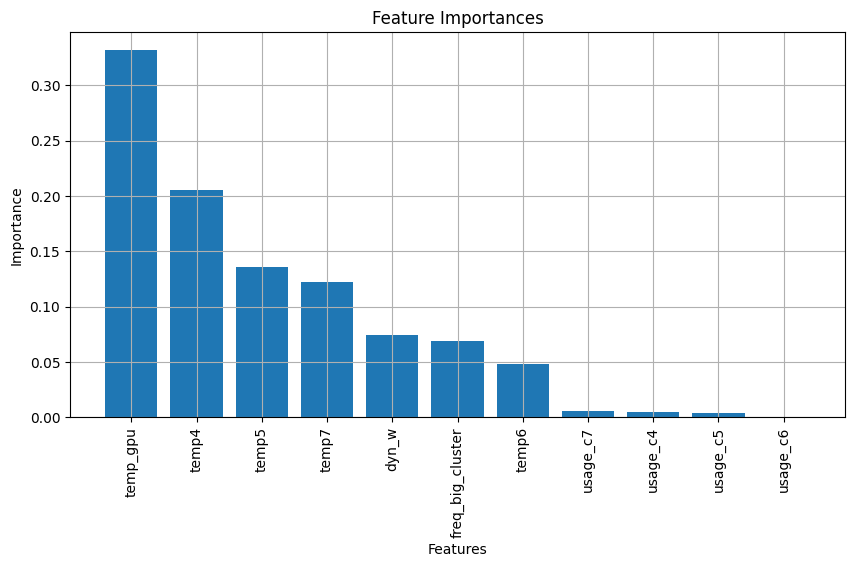

In [24]:
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.grid(True)
plt.bar(range(train_data.shape[1]), feature_importances[indices])
plt.xticks(range(train_data.shape[1]), features[indices], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Features')
file_name = "plots/hw2_q3.png"
plt.savefig(file_name)
plt.show()
